In [100]:
from keras.applications import MobileNet
from keras.models import Sequential,Model 
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
# MobileNet is designed to work with images of dim 224,224
img_rows,img_cols = 224,224
import pandas as ps
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import cv2
import  pickle
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [101]:
top_model =load_model('data_utiliser/model-top.h5')


In [102]:
top_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [103]:
from tensorflow.keras import layers
last_layer=top_model.get_layer('activation_21')
last_layer

In [104]:
last_output = last_layer.output
last_output



<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'activation_21')>

In [105]:
final_output=BatchNormalization()(last_output)

In [106]:
final_output=layers.Dense(7,name="dens_8")(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dens_8')>

In [107]:
final_output=layers.Activation('relu')(final_output)
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'activation_2')>

In [108]:
new_model = Model(inputs=top_model.input, outputs=final_output) 


In [109]:
new_model.summary() 


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128 

In [110]:
train_data_dir = 'C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2'
validation_data_dir = 'C:/Users/Anouar Gmili/Desktop/images_fer2013/validation'
img_rows,img_cols = 48,48

In [111]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size = (img_rows,img_cols),
                        batch_size = batch_size,
    color_mode = "grayscale",
                        class_mode = 'categorical'
                        )

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
color_mode = "grayscale",
                            class_mode='categorical')


Found 2861 images belonging to 7 classes.
Found 412 images belonging to 7 classes.


In [112]:

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [113]:

checkpoint = ModelCheckpoint(
                        'top_tap_tip3.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)


In [114]:

callbacks = [earlystop,checkpoint,learning_rate_reduction]

new_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy']
              )

nb_train_samples = 2861    
nb_validation_samples = 412 
epochs = 25


In [ ]:
 history = new_model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples//batch_size,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples//batch_size)


Epoch 1/25
89/89 [==============================] - 114s 1s/step - loss: 9.7526 - accuracy: 0.0881 - val_loss: 8.6309 - val_accuracy: 0.2552

Epoch 00001: val_loss improved from inf to 8.63093, saving model to top_tap_tip3.h5
Epoch 2/25
89/89 [==============================] - 89s 995ms/step - loss: 8.6903 - accuracy: 0.1352 - val_loss: 7.6474 - val_accuracy: 0.0651

Epoch 00002: val_loss improved from 8.63093 to 7.64745, saving model to top_tap_tip3.h5
Epoch 3/25
89/89 [==============================] - 87s 978ms/step - loss: 8.0354 - accuracy: 0.1702 - val_loss: 6.7564 - val_accuracy: 0.0781

Epoch 00003: val_loss improved from 7.64745 to 6.75637, saving model to top_tap_tip3.h5
Epoch 4/25
89/89 [==============================] - 85s 953ms/step - loss: 7.7278 - accuracy: 0.1741 - val_loss: 7.0074 - val_accuracy: 0.0964

Epoch 00004: val_loss did not improve from 6.75637
Epoch 5/25
89/89 [==============================] - 89s 1s/step - loss: 7.3348 - accuracy: 0.1894 - val_loss: 8.825

#### classifier =load_model('top_tap_tip .h5')


In [71]:
new_model.save("tata.h5")

# test de my model


In [94]:
class_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
class_labels2 = ['Angry','Happy','Neutral','Sad','Surprise']

In [95]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
img_rows,img_cols = 224,224
#MobileNet = MobileNet(weights='imagenet',include_top=False,input_shape=(img_rows,img_cols,3))
recognizer =cv2.face.LBPHFaceRecognizer_create()
labels2 ={"personne_name":1}
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
import matplotlib.pyplot as plt

(1, 48, 48, 1)

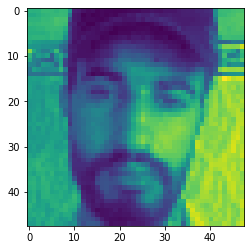

In [96]:
# Grab a single frame of video

frame=cv2.imread('sad_anouar.jpg')
labels = []
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray,1.3,5)
for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    plt.imshow(roi_gray)
    if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0)
        #name = labels2[id_]
roi.shape

In [97]:
preds=new_model.predict(roi)


In [98]:
preds



array([[0.63977885, 1.3803997 , 1.0351917 , 0.5192385 , 0.3111938 ,
        0.        , 0.        ]], dtype=float32)

In [99]:
label=class_labels[preds.argmax()]
print("\nprediction max = ",preds.argmax())
print("\nlabel = ",label)


prediction max =  1

label =  Disgust


# deuxiemme chance


In [11]:
from keras.applications import MobileNet
from keras.models import Sequential,Model 
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
# MobileNet is designed to work with images of dim 224,224
img_rows,img_cols = 224,224
import pandas as ps
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import cv2
import  pickle
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [12]:
top_model =load_model('data_utiliser/model-top.h5')


In [13]:
top_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [14]:
from tensorflow.keras import layers
last_layer=top_model.get_layer('activation_21')
last_layer

In [15]:
def addTopModelMobileNet(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    #top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(7,activation='relu')(top_model)
    top_model = Dense(7,activation='relu')(top_model)
    top_model = Dense(7,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [16]:
num_classes = 7

FC_Head = addTopModelMobileNet(top_model, num_classes)

model = Model(inputs = top_model.input, outputs = FC_Head)

print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128 

In [17]:
train_data_dir = 'C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2'
validation_data_dir = 'C:/Users/Anouar Gmili/Desktop/images_fer2013/validation'
img_rows,img_cols = 48,48

In [27]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size = (img_rows,img_cols),
                        batch_size = batch_size,
    
                        color_mode = "grayscale",

                        class_mode = 'categorical'
                        )

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
                            color_mode = "grayscale",

                            class_mode='categorical')


Found 2861 images belonging to 7 classes.
Found 412 images belonging to 7 classes.


In [28]:

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [29]:

checkpoint = ModelCheckpoint(
                        'top_tap_tiprelax.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)


In [30]:

callbacks = [earlystop,checkpoint,learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy']
              )

nb_train_samples = 2861    
nb_validation_samples = 412 
epochs = 25


In [31]:
 history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples//batch_size,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples//batch_size)


Epoch 1/25
89/89 [==============================] - 87s 935ms/step - loss: 1.9038 - accuracy: 0.4275 - val_loss: 1.9816 - val_accuracy: 0.0859

Epoch 00001: val_loss improved from inf to 1.98162, saving model to top_tap_tiprelax.h5
Epoch 2/25
89/89 [==============================] - 83s 935ms/step - loss: 1.7021 - accuracy: 0.4324 - val_loss: 2.1272 - val_accuracy: 0.0911

Epoch 00002: val_loss did not improve from 1.98162
Epoch 3/25
89/89 [==============================] - 94s 1s/step - loss: 1.6456 - accuracy: 0.4321 - val_loss: 2.1499 - val_accuracy: 0.0938

Epoch 00003: val_loss did not improve from 1.98162
Epoch 4/25
89/89 [==============================] - 95s 1s/step - loss: 1.6049 - accuracy: 0.4396 - val_loss: 2.1832 - val_accuracy: 0.0885

Epoch 00004: val_loss did not improve from 1.98162
Epoch 5/25
89/89 [==============================] - 89s 996ms/step - loss: 1.6147 - accuracy: 0.4265 - val_loss: 2.2140 - val_accuracy: 0.0938

Epoch 00005: val_loss did not improve from 1.

89/89 [==============================] - 87s 972ms/step - loss: 1.2400 - accuracy: 0.5696 - val_loss: 1.5775 - val_accuracy: 0.3411

Epoch 00023: val_loss did not improve from 1.54244
Epoch 24/25
89/89 [==============================] - 84s 950ms/step - loss: 1.2289 - accuracy: 0.5555 - val_loss: 1.6712 - val_accuracy: 0.3776

Epoch 00024: val_loss did not improve from 1.54244
Epoch 25/25
89/89 [==============================] - 83s 937ms/step - loss: 1.2504 - accuracy: 0.5682 - val_loss: 1.6635 - val_accuracy: 0.3750

Epoch 00025: val_loss did not improve from 1.54244
